<a href="https://colab.research.google.com/github/delusidiot/practice_tensorflow2.0/blob/master/StartWithTensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

TensorFlow 2.x selected.


In [2]:
from tensorflow.keras import datasets
mnist = datasets.mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
image = train_x[1]
image.shape

(28, 28)

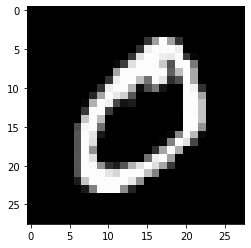

In [4]:
plt.imshow(image, 'gray')
plt.show()

In [6]:
np.expand_dims(train_x,-1) # numpy
tf.expand_dims(train_x, -1) # tensorflow
train_x[..., tf.newaxis].shape # 공식 홈페이지에서 
# 이 외에도 reshaped를 하는 방법등이 있습니다. 위 방법으로 충분할 것입니다.

(60000, 28, 28, 1)

In [7]:
new_train_x = train_x[..., tf.newaxis]
new_train_x.shape
# 시각화 할때는 한차원을 없애줘야합니다...

(60000, 28, 28, 1)

In [10]:
#한 차원 없애는 방법
print(np.squeeze(new_train_x[0]).shape)
disp = new_train_x[3, :, :, 0]
print(disp.shape)

(28, 28)
(28, 28)


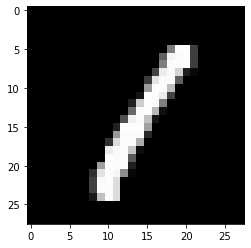

In [11]:
plt.imshow(disp,'gray')
plt.show()

In [0]:
train_y.shape

(60000,)

In [0]:
train_y[0]

5

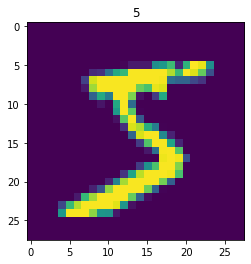

In [0]:
plt.title(train_y[0])
plt.imshow(train_x[0])
plt.show()

# OneHot Encoding

In [12]:
from tensorflow.keras.utils import to_categorical
to_categorical(1,10)# 1번째 전체, class 갯수

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [13]:
label = train_y[0]
label_onehot = to_categorical(label, num_classes=10)
label_onehot

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Layer Explaination


In [0]:
mnist = datasets.mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()
image = train_x[0]

In [15]:
image.shape

(28, 28)

In [0]:
# 채널 수를 늘리기
image = image[tf.newaxis,...,tf.newaxis]

In [17]:
image.shape

(1, 28, 28, 1)

In [18]:
train_x.shape

(60000, 28, 28)

#Feature Extraction

## Convolution

filters : layer에서 나갈 때 몇 개의 filter를 만들 것인지

kernel_size : filter(Weight)의 사이즈

strides : 몇 개의 pixel을 skip 하면서 훑어지나갈 것인지 (사이즈에도 영향을 줌)

padding : zero padding을 만들것인지, VALID는 Padding이 없고, SAME은 Padding이 있음(사이즈에 영향을 줌)

activation : Activation Function을 만들것인지. 당장 설정 안해도 Layer층을 따로 만들 수 있습니다.

In [0]:
layer = tf.keras.layers.Conv2D(filters=3, kernel_size=(3,3), strides=(1,1),padding='SAME', activation='relu')

## Visualization
- tf.keras.layers.Conv2D

In [24]:
image = tf.cast(image, dtype=tf.float32) #float로 해주어야 됩니다..
print(image.dtype)
print(image.shape)
layer = tf.keras.layers.Conv2D(5,3,1,padding='SAME')

<dtype: 'float32'>
(1, 28, 28, 1)


In [0]:
output = layer(image)

In [31]:
output[0,:,:,0].shape


TensorShape([28, 28])

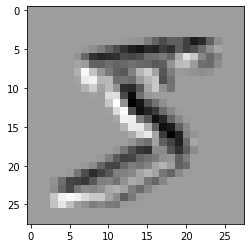

In [32]:
plt.imshow(output[0, :, :, 0],'gray')
plt.show()

In [0]:
weight = layer.get_weights()

In [29]:
weight[0].shape, weight[1].shape

((3, 3, 1, 5), (5,))

# Activation Function

## ReLU

In [35]:
act =tf.keras.layers.ReLU()
act_output = act(output)
act_output.shape

TensorShape([1, 28, 28, 5])

In [36]:
np.min(output), np.max(output)
np.min(act_output), np.max(act_output)

(0.0, 208.10634)

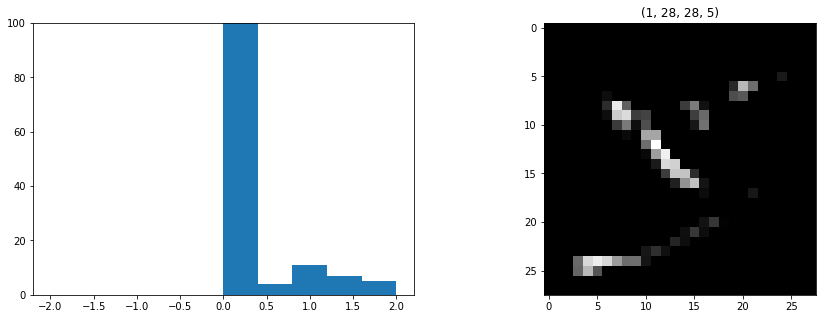

In [38]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(act_output.numpy().ravel(), range=[-2, 2])
plt.ylim(0,100)

plt.subplot(122)
plt.title(act_output.shape)
plt.imshow(act_output[0,:,:,0],'gray')
plt.show()

# Pooling


In [39]:
tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='SAME')

In [0]:
pool_layer = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='SAME')
pool_output = pool_layer(act_output)

In [41]:
act_output.shape

TensorShape([1, 28, 28, 5])

In [42]:
pool_output.shape

TensorShape([1, 14, 14, 5])

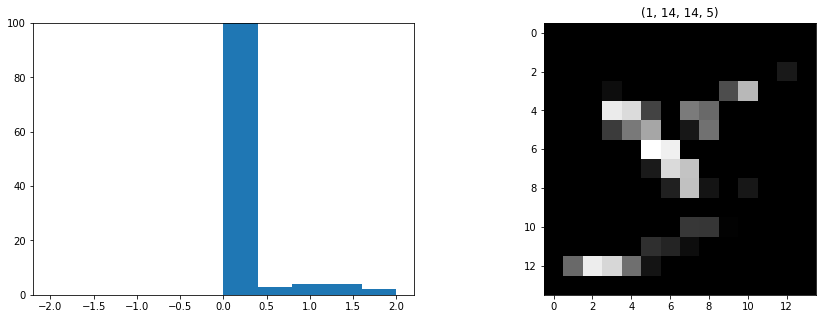

In [43]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(pool_output.numpy().ravel(), range=[-2, 2])
plt.ylim(0,100)

plt.subplot(122)
plt.title(pool_output.shape)
plt.imshow(pool_output[0,:,:,0],'gray')
plt.show()

#Fully Connected

## Flaten

In [0]:
layer = tf.keras.layers.Flatten()
flatten = layer(output)

In [45]:
flatten.shape

TensorShape([1, 3920])

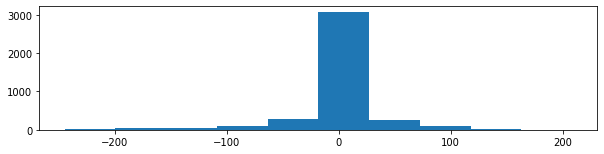

In [46]:
plt.figure(figsize=(10,5))
plt.subplot(211)
plt.hist(flatten.numpy().ravel())
plt.show()

## Dense
연결하겠다는 것입니다.

In [47]:
tf.keras.layers.Dense(32, activation='relu')

In [0]:
layer = tf.keras.layers.Dense(32, activation='relu')

In [0]:
output = layer(flatten)

In [54]:
output.shape

TensorShape([1, 32])

In [0]:
layer_2 = tf.keras.layers.Dense(64, activation='relu')
output_example = layer_2(output)

In [56]:
output_example.shape

TensorShape([1, 64])

## DROP OUT
tf.keras.layers.Dropout

In [0]:
layer = tf.keras.layers.Dropout(0.7) # 얼마나 끊을껀지 비율

# Build Model

In [0]:
from tensorflow.keras import layers

In [0]:
input_shape = (28,28,1)
num_classes = 10

In [0]:
inputs = layers.Input(shape=input_shape)

# Feature Extraction
net = layers.Conv2D(32, 3, padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, 3, padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2,2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Conv2D(64, 3, padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, 3, padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2,2))(net)
net = layers.Dropout(0.25)(net)

# Fully Connected
net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.25)(net)
net = layers.Dense(10)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name="Basic_CNN")

In [74]:
model

In [75]:
model.summary()

Model: "Basic_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
activation_13 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_14 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 32)        0 